### import all the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

/home/mio_mio_nigahh/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### read and get information from data

In [2]:
data = pd.read_csv('Base.csv')
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

### delete the null values

In [3]:
data = data.dropna()

threshold = len(data) * 0.4
data = data.dropna(thresh = threshold, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

### map the columns with categorical to numerical 

In [4]:
categorical_columns = data.select_dtypes(include=['object']).columns

data[categorical_columns] = data[categorical_columns].apply(lambda x: x.astype('category').cat.codes)
data

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,0,1059,...,0,1500.0,0,0,16.224843,0,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,3,1658,...,0,1500.0,0,0,3.363854,2,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1,1095,...,0,200.0,0,0,22.730559,3,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,1,3483,...,0,200.0,0,0,15.215816,0,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,0,2339,...,0,200.0,0,0,3.743048,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,1,530,...,0,1500.0,0,0,16.967770,2,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,2,408,...,1,1000.0,0,0,1.504109,1,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,0,749,...,0,200.0,0,0,16.068595,2,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,1,707,...,0,200.0,0,0,1.378683,0,1,1,0,7


### spliting data to train and test with 70:30 ratio

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop('fraud_bool', axis=1)
Y = data['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7)


### standardize and making more sample for increas the efficiency of the model

In [6]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, Y)

X = X_res
Y = y_res
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

### Apply PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_scaled)
pca_2D = pca.transform(X_scaled)

### Apply Kmeans clustring

/home/mio_mio_nigahh/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


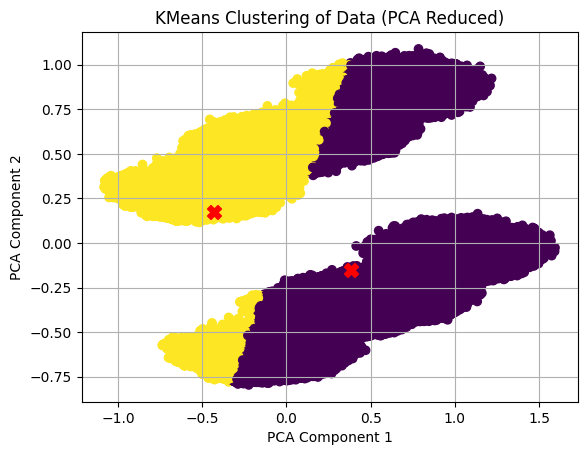

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit_predict(pca_2D)


plt.scatter(pca_2D[:, 0], pca_2D[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Center')

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering of Data (PCA Reduced)')
plt.grid(True)
plt.show()


### check Kmeans efficiency

In [9]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

f1 = f1_score(Y, kmeans.labels_, average='weighted')
accuracy = accuracy_score(Y, kmeans.labels_)
precision = precision_score(Y, kmeans.labels_, average='weighted')
recall = recall_score(Y, kmeans.labels_, average='weighted')

print("F1 = " , f1)
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)

F1 =  0.7230293631619853
Accuracy =  0.7232921895586423
Precision =  0.7241429756390115
Recall =  0.7232921895586423


### apply KNN algorithm

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    692314
           1       0.06      0.00      0.00      7686

    accuracy                           0.99    700000
   macro avg       0.52      0.50      0.50    700000
weighted avg       0.98      0.99      0.98    700000



### apply lazypredict

##### for decrease the time of run we can making data smaller

In [11]:
Xs, _, ys, _ = train_test_split(X, Y, test_size=0.975)
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.3)

### decreas the demontion for lazy

In [12]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [13]:
# from lazypredict.Supervised import LazyClassifier
# from sklearn.utils import all_estimators
# from sklearn.base import ClassifierMixin


# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# print(models)

### Cross validation by using KNN algorithm

#### apply pca for run

In [14]:
pca = PCA(n_components=2)
X2d = pca.fit_transform(X)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf, X2d, Y, cv=5)
print(scores)
print(scores.mean())

[0.59834829 0.62566452 0.61927055 0.60878995 0.50732328]
0.5918793168585492
